In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [14]:
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.6, random_state=0)

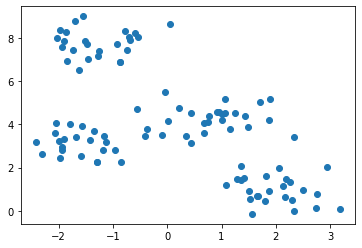

In [8]:
plt.scatter(X[:,0], X[:,1])

C:\Users\Lila\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lila\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lila\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lila\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

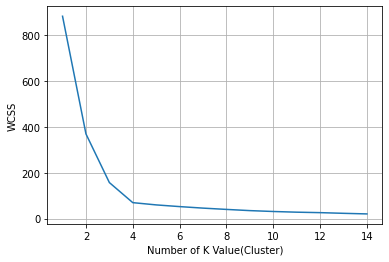

In [9]:
WCSS = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    
plt.plot(range(1,15),WCSS)
plt.xlabel('Number of K Value(Cluster)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

C:\Users\Lila\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


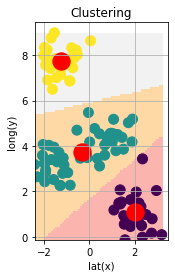

In [15]:
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=1)
clusters = kmeans.fit_predict(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

h=0.1
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize=(10,4))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Pastel1, origin='lower')
plt.scatter(x=X[:,0], y=X[:,1], c=labels, s=100)
plt.scatter(x=centroids[:,0], y=centroids[:,1], s=300, c='red')
plt.ylabel('long(y)'), plt.xlabel('lat(x)')
plt.grid()
plt.title('Clustering')
plt.show()